# Pandas Test - Real life exercise

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

For visualizations:

In [2]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [3]:
ad_recs_annotated = pd.read_csv('data/ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
339650,2022-week_05,AD08M88AY8,Extreme DA,US,yes,NaN,Yield,RuleBasedY
90047,2021-week_39,AD07YJQSKD,Fancy,GB,yes,NaN,Qality,RNNQ
194818,2021-week_46,AD07GVJ8LZ,Puentes Company,IN,no,True,Yield,UserPopY
298408,2022-week_02,AD07HGKW8C,Extreme DA,US,no,True,Yield,RuleBasedY
328652,2022-week_04,AD09G6VHYP,Extreme DA,US,yes,NaN,Yield,RNNY


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

1. Add a column with the sample year
1. Add a column with the sample quarter (google how to)
1. Add a new success column with values 1 and 0 for yes and no 
1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
1. Capitlize (first letter only) the is_success column (Inplace)

A to Q1:

In [4]:
# Add a column with the sample year
ad_recs_annotated["year"] = ad_recs_annotated["week_id"].apply(lambda x: x[:4])
ad_recs_annotated.head()

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY,2021
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021
3,2021-week_33,AD89608808,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2021
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021


A to Q2:

In [5]:
# Add a column with the sample quarter # 1 3 4 , sub 1-5, analysis 1,2,6
week = ad_recs_annotated["week_id"].apply(lambda x: x[-2:])
ad_recs_annotated["qtr"] = week.apply(lambda x: (int(x)//13)+1)
ad_recs_annotated["qtr"]

0         3
1         3
2         3
3         3
4         3
         ..
373783    5
373784    5
373785    5
373786    5
373787    5
Name: qtr, Length: 373788, dtype: int64

A to Q3:

In [6]:
# Add a new success column with values 1 and 0 for yes and no
ad_recs_annotated["success"] = ad_recs_annotated["is_success"].apply(lambda x: 1 if x=="yes" else 0)
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,qtr,success
17825,2021-week_34,AD098DL88H,MoJoe Brewing Company,GB,yes,NaN,Yield,DNNY,2021,3,1
215787,2021-week_48,AD08N9U8Y7,"OpenDesks, Inc.",DE,yes,NaN,Yield,DNNY,2021,4,1
138038,2021-week_42,AD08MQVHM8,Search Million Culture,IN,yes,NaN,Qality,UserPopQ,2021,4,1
230442,2021-week_49,AD0988QPH8,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,4,1
347516,2022-week_06,AD0088GEE8,Fancy,GB,yes,NaN,Qality,DNNQ,2022,1,1


A to Q4:

In [7]:
# Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs.
ad_recs_annotated["is_sever_new"] =  ad_recs_annotated["is_sever"].apply(lambda x: x if x==x else False)
temp = [x!=x for x in ad_recs_annotated["is_sever"].tolist()]
sum_nan = sum(temp)
print("\nA to Q4:\n")
print(f"There are {sum_nan} NaN values in 'is_sever' ({round(100*sum_nan/len(ad_recs_annotated['is_sever']),2)}%)")
temp2 = [x!=x for x in ad_recs_annotated["is_sever_new"].tolist()]
sum_2_nan = sum(temp2)
if sum_2_nan == 0:
    print("Indeed there are no NaNs in the new column.\n")
else:
    print(f"Error - there are {sum_2_nan} NaN values in the new column!\n")
    raise ValueError
ad_recs_annotated.sample(5)


A to Q4:

There are 304195 NaN values in 'is_sever' (81.38%)
Indeed there are no NaNs in the new column.



,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,qtr,success,is_sever_new
10974,2021-week_33,AD00EW8QLW,Tab Solutions,US,yes,NaN,Qality,RNNQ,2021,3,1,False
281766,2022-week_01,AD07Y88PPG,RelayFoods,JP,yes,NaN,Qality,DNNQ,2022,1,1,False
373297,2022-week_52,AD07KCKPNK,Extreme DA,US,yes,NaN,Yield,XGBY,2022,5,1,False
195642,2021-week_46,AD097G88SJ,MoJoe Brewing Company,IN,yes,NaN,Yield,UserPopY,2021,4,1,False
219234,2021-week_48,AD07NS889D,MoJoe Brewing Company,GB,yes,NaN,Yield,UserPopY,2021,4,1,False


A to Q5:

In [8]:
# 5. Capitlize (first letter only) the is_success column (Inplace)
ad_recs_annotated.loc[:,"is_success"] = ad_recs_annotated.loc[:,"is_success"].str.capitalize()
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,qtr,success,is_sever_new
267358,2021-week_51,AD077X9YMC,RelayFoods,IN,Yes,NaN,Qality,ManualQ,2021,4,1,False
51289,2021-week_36,AD0788C868,Search Million Culture,IN,Yes,NaN,Qality,UserPopQ,2021,3,1,False
329835,2022-week_05,AD08W889SK,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2022,1,1,False
160930,2021-week_44,AD07ZVPTXD,LocalVox Media,GB,No,True,Yield,DNNY,2021,4,0,True
6026,2021-week_33,AD077888D8,iDreamsky Technology,IN,Yes,NaN,Qality,UserPopQ,2021,3,1,False


## Subset selection

A to Q1:

In [9]:
# 1. How many requests are there in US region?
ad_recs_annotated[ad_recs_annotated["region"]=="US"].shape[0]

103846

A to Q2:

In [10]:
# 2. How many successful requests are there in US region?
ad_recs_annotated[(ad_recs_annotated["region"]=="US") & (ad_recs_annotated["is_success"]=="yes")].shape[0]

0

A to Q3:

In [11]:
# 3. How many successful requests are there in US region, on week 52?
ad_recs_annotated[(ad_recs_annotated["region"]=="US") & (ad_recs_annotated["is_success"]=="yes") & (ad_recs_annotated["week_id"].apply(lambda x: int(x[-2:]))==52)].shape[0]

0

A to Q4:

In [12]:
# 4. How many requests where delivered by DDNQ, RRNY and UserPopQ together?
ad_recs_annotated[ad_recs_annotated["rec_provider"].isin(["DDNQ", "RRNY", "UserPopQ"])].shape[0]


69937

A to Q5:

In [13]:
# 5. How many requests where delivered by rule based providers?
sum(ad_recs_annotated["rec_provider"].str.startswith("RuleBased"))

28336

A to Q6:

In [14]:
# 6. Select only the requests from 2021 - How many are there? 
req_2021 = ad_recs_annotated[ad_recs_annotated["week_id"].str.startswith("2021")]
print(f"\n There are {req_2021.shape[0]} requests from year 2021.\n")
display(req_2021.sample(5))



 There are 271615 requests from year 2021.



,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,qtr,success,is_sever_new
213435,2021-week_47,AD08FS8CTQ,Extreme DA,US,No,True,Yield,DNNY,2021,4,0,True
137878,2021-week_42,AD0968PPTW,Search Million Culture,IN,No,True,Qality,UserPopQ,2021,4,0,True
73467,2021-week_38,AD08CMZHDF,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
58189,2021-week_37,AD08RHMVVS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
120083,2021-week_41,AD00MA8RMI,Tab Solutions,GB,No,True,Qality,DNNQ,2021,4,0,True


A to Q7:

In [15]:
# 7. Select the reqeusts from week 30 to week 40 - How many are there? 
inc = sum(ad_recs_annotated["week_id"].apply(lambda x : 30 <= int(x[-2:]) <= 40))
exc = sum(ad_recs_annotated["week_id"].apply(lambda x : 30 <= int(x[-2:]) < 40))
print(f"\n{inc} (including week 40) \nor \n{exc} (excluding week 40)\n")


115051 (including week 40) 
or 
100645 (excluding week 40)



A to Q8:

In [16]:
# 8. Select all the data that comes from the most popular Ad
pop_ad = ad_recs_annotated.ad_id.value_counts().index[0]
ad_recs_annotated[ad_recs_annotated.ad_id==pop_ad]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,qtr,success,is_sever_new
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
363533,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,5,1,False
363534,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,5,1,False
363535,2022-week_52,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2022,5,1,False
363536,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,5,1,False


A to Q9:

In [17]:
# 9. Select all the data that comes from the least popular provider
least_provider = ad_recs_annotated.rec_provider.value_counts().index[-1]
ad_recs_annotated[ad_recs_annotated.rec_provider==least_provider]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,qtr,success,is_sever_new
352263,2022-week_06,AD0088UP8R,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352326,2022-week_06,AD09C8KC8Z,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352578,2022-week_06,AD078DT6GJ,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352595,2022-week_06,AD09C8P789,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352703,2022-week_06,AD00UF8VOF,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352714,2022-week_06,AD098CXHRF,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352738,2022-week_06,AD0086GLW0,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352740,2022-week_06,AD08QMJ888,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352745,2022-week_06,AD07H9GM98,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352803,2022-week_06,AD09G9YKC8,MoJoe Brewing Company,JP,No,False,Yield,UserPopSelectionY,2022,1,0,False


A to Q10:

In [18]:
# 10. Select the data in which is_sever is None. How big is it? 
mask=ad_recs_annotated.is_sever.isna()
display(ad_recs_annotated[mask])
sum(mask)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,qtr,success,is_sever_new
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,3,1,False
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,False
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,5,1,False
373784,2022-week_52,AD07C8XSMN,Fancy,US,Yes,NaN,Qality,RNNQ,2022,5,1,False
373785,2022-week_52,AD096LRR88,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,5,1,False
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,Yes,NaN,Qality,DNNQ,2022,5,1,False


304195

A to Q11:

In [19]:
# 11. Select the data in which the requester is a 3 word company
mask = ad_recs_annotated.requester.apply(lambda x: len(x.split())==3)
ad_recs_annotated[mask]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,qtr,success,is_sever_new
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,3,1,False
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,False
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
373663,2022-week_52,AD09G98VJZ,MoJoe Brewing Company,US,Yes,NaN,Yield,RNNY,2022,5,1,False
373689,2022-week_52,AD078WDG8W,MoJoe Brewing Company,US,Yes,NaN,Yield,RNNY,2022,5,1,False
373691,2022-week_52,AD08M86WW8,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,5,1,False
373722,2022-week_52,AD09C8X6VY,Search Million Culture,US,Yes,NaN,Qality,DNNQ,2022,5,1,False


A to Q12:

In [20]:
# 12. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
mask_2 = ad_recs_annotated.ad_id.str.contains("6")
ad_recs_annotated[mask_2 & mask]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,qtr,success,is_sever_new
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,False
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
11,2021-week_33,AD88967068,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,False
41,2021-week_33,AD07L6JC8W,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
373364,2022-week_52,AD06XJR86M,MoJoe Brewing Company,US,Yes,NaN,Yield,RuleBasedY,2022,5,1,False
373394,2022-week_52,AD08Y6R9WV,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,5,1,False
373511,2022-week_52,AD09C68T8Y,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,5,1,False
373691,2022-week_52,AD08M86WW8,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,5,1,False


A to Q13:

In [21]:
# 13. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30
from functools import reduce

def str_mult_30(s):
    
    digits=[int(i) for i in s if i.isnumeric()]
    
    if len(digits) == 0:
        return False
    elif len(digits) == 1:
        mult = digits[0]
    else:
        mult = reduce(lambda a,b : a*b , digits)
    
    if mult > 30:
        return True
    else:
        return False

mask_3 = ad_recs_annotated.ad_id.apply(str_mult_30)
print("\nNote: the current implementation multiplies digit by digit, and so interprets for example 100 as 1*0*0 which is equal to zero, same with 077 (0*7*7) or even 32 (3*2 = 6 < 30).\n")
ad_recs_annotated[mask_3 & mask]


Note: the current implementation multiplies digit by digit, and so interprets for example 100 as 1*0*0 which is equal to zero, same with 077 (0*7*7) or even 32 (3*2 = 6 < 30).



,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,qtr,success,is_sever_new
37,2021-week_33,AD88898888,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,False
76,2021-week_33,AD88898786,MoJoe Brewing Company,DE,Yes,NaN,Yield,BooksY,2021,3,1,False
112,2021-week_33,AD88788887,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,False
162,2021-week_33,AD88887688,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,False
174,2021-week_33,AD88888876,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
360315,2022-week_52,AD89888888,MoJoe Brewing Company,GB,Yes,NaN,Yield,ManualQ,2022,5,1,False
362075,2022-week_52,AD88888997,Search Million Culture,GB,Yes,NaN,Qality,UserPopQ,2022,5,1,False
362199,2022-week_52,AD88688888,Mission Street Manufacturing,GB,No,False,Qality,UserPopQ,2022,5,0,False
363286,2022-week_52,AD88887888,Search Million Culture,GB,Yes,NaN,Qality,UserPopQ,2022,5,1,False


## Analysis

A to Q1:

In [22]:
# ANALYSIS
# 1. How many weeks available in the data? Are there any missing weeks?

weeks = ad_recs_annotated["week_id"]
wk_ls = sorted(weeks.unique().tolist())
print(wk_ls)

# Verbal answer:
print(f"\nThere are {len(wk_ls)} weeks available in the data. Week #52 is missing from year 2021, since it was mistakenly written as year 2022 - {wk_ls[-1]}")

print("\nFixing week 52:\n")
ad_recs_annotated.loc[ad_recs_annotated["week_id"]=="2022-week_52","week_id"] = "2021-week_52"
weeks = ad_recs_annotated["week_id"]
wk_ls = sorted(weeks.unique().tolist())
print(wk_ls)


['2021-week_33', '2021-week_34', '2021-week_35', '2021-week_36', '2021-week_37', '2021-week_38', '2021-week_39', '2021-week_40', '2021-week_41', '2021-week_42', '2021-week_43', '2021-week_44', '2021-week_45', '2021-week_46', '2021-week_47', '2021-week_48', '2021-week_49', '2021-week_50', '2021-week_51', '2022-week_01', '2022-week_02', '2022-week_03', '2022-week_04', '2022-week_05', '2022-week_06', '2022-week_52']

There are 26 weeks available in the data. Week #52 is missing from year 2021, since it was mistakenly written as year 2022 - 2022-week_52

Fixing week 52:

['2021-week_33', '2021-week_34', '2021-week_35', '2021-week_36', '2021-week_37', '2021-week_38', '2021-week_39', '2021-week_40', '2021-week_41', '2021-week_42', '2021-week_43', '2021-week_44', '2021-week_45', '2021-week_46', '2021-week_47', '2021-week_48', '2021-week_49', '2021-week_50', '2021-week_51', '2021-week_52', '2022-week_01', '2022-week_02', '2022-week_03', '2022-week_04', '2022-week_05', '2022-week_06']


A to Q2:

In [23]:
# 2. How many regions available in the data? Are there any missing weeks per region?
regions = ad_recs_annotated["region"].unique()
print(f"{len(regions)} regions are available\n")

region_weeks = ad_recs_annotated.groupby(by="region").apply(lambda df: df["week_id"].unique())

missing_weeks = region_weeks.copy() #pd.Series([0,0,0,0,0])
for i, elem in enumerate(missing_weeks):
    missing_weeks[i] = str(list(set(weeks) - set(elem)))

display(missing_weeks)


print(f"\n{missing_weeks[-2]} is missing from {missing_weeks.index[-2]}")

5 regions are available



region
DE                  []
GB                  []
IN                  []
JP    ['2021-week_51']
US                  []
dtype: object


['2021-week_51'] is missing from JP


A to Q3:

In [79]:
# 3. How many ads are being sent to annotation in each region per week?
print("\nNumber of ads per region on EACH week:\n")
ads_per_wk_ser = ad_recs_annotated.groupby(by="region")["week_id"].value_counts(sort=False)
countries = ads_per_wk_ser.index.droplevel(1).unique().tolist()
weeks = ads_per_wk_ser.index.droplevel(0).unique().tolist()

ads_per_wk_df = pd.DataFrame({country : [np.nan]*len(weeks) for country in countries}, index=weeks)
for country in countries:
    ads_per_wk_df.loc[:,country].update(ads_per_wk_ser[country])

display(ads_per_wk_df)

print("\nNumber of ads per region on an AVERAGE week (Method #1):\n")
mean_ads_per_wk = ads_per_wk_df.mean(axis=0)
mean_ads_per_wk.index = mean_ads_per_wk.index.rename("region")
display(mean_ads_per_wk)

print("\nNumber of ads per region on an AVERAGE week (Method #2):\n")
display(ad_recs_annotated.groupby(["region", "week_id"])["is_success"].count().groupby("region").mean())


Number of ads per region on EACH week:



,DE,GB,IN,JP,US
2021-week_33,2395.0,3180.0,3196.0,1611.0,3974.0
2021-week_34,2360.0,3187.0,3219.0,1599.0,4006.0
2021-week_35,2393.0,3209.0,3209.0,1580.0,3982.0
2021-week_36,2401.0,3209.0,3213.0,1589.0,3978.0
2021-week_37,2404.0,3181.0,3183.0,1644.0,3980.0
2021-week_38,2400.0,3188.0,3175.0,1594.0,3990.0
2021-week_39,2407.0,3206.0,3212.0,1593.0,3998.0
2021-week_40,2399.0,3211.0,3191.0,1618.0,3987.0
2021-week_41,2399.0,3202.0,3214.0,1573.0,3992.0
2021-week_42,2396.0,3166.0,3211.0,1599.0,4004.0



Number of ads per region on an AVERAGE week (Method #1):



region
DE    2391.423077
GB    3191.692308
IN    3198.230769
JP    1665.080000
US    3994.076923
dtype: float64


Number of ads per region on an AVERAGE week (Method #2):



region
DE    2391.423077
GB    3191.692308
IN    3198.230769
JP    1665.080000
US    3994.076923
Name: is_success, dtype: float64

A to Q4:

In [89]:
# 4. How many None values are there in is_sever column?
print("Method #1:")
print(ad_recs_annotated.is_sever.shape[0] - ad_recs_annotated.is_sever.dropna().shape[0])
print("\nMethod #2:")
print(ad_recs_annotated.is_sever.value_counts(dropna=False)[ad_recs_annotated.is_sever.value_counts(dropna=False).index!=ad_recs_annotated.is_sever.value_counts(dropna=False).index].values[0])

Method #1:
304195

Method #2:
304195


A to Q5:

In [26]:
# 5. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
ad_wk_counts = ad_recs_annotated.groupby(["ad_id", "week_id"])["is_success"].count().sort_values(ascending=False)
display(ad_wk_counts)
print(f"\nYes. The ad with ad_id = '{ad_wk_counts.index[0][0]}' was sent {ad_wk_counts[0]} times, on week '{ad_wk_counts.index[0][1]}'.")

ad_id       week_id     
AD098SWYF6  2021-week_40    81
AD08C8RR8J  2021-week_47    70
AD07QS8VCL  2021-week_47    58
AD00IGCC8G  2021-week_47    56
AD098C6SNV  2021-week_47    55
                            ..
AD07GRVV8L  2021-week_47     1
AD07GRVT8R  2021-week_37     1
AD07GRTNSP  2021-week_49     1
AD07GRTNPJ  2021-week_37     1
ADOO8X898E  2021-week_50     1
Name: is_success, Length: 358763, dtype: int64


Yes. The ad with ad_id = 'AD098SWYF6' was sent 81 times, on week '2021-week_40'.


A to Q6:

In [27]:
# 6. Are there ads that are being sent in more than one week?
# A. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
# B. What are the weeks that the ad from above was sent in?
# C. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.

ad_diff_weeks = ad_recs_annotated.groupby("ad_id")["week_id"].nunique().sort_values(ascending=False)
display(ad_diff_weeks)

print(f"\nA. Ad '{ad_diff_weeks.index[0]}' was sent the most amount of different weeks (tied with {ad_diff_weeks.index[1]} and {ad_diff_weeks.index[2]})")
print(f"\nB. It was sent on the following weeks:\n")
print(ad_recs_annotated.loc[ad_recs_annotated["ad_id"]==ad_diff_weeks.index[0], "week_id"].unique().tolist())

ads_is_success_counts = ad_recs_annotated.groupby("ad_id")["is_success"].nunique().sort_values(ascending=False)
ad_example = ads_is_success_counts.index[0]
print(f"\nC. Yes, there are many. For example '{ad_example}':")
display(ad_recs_annotated.loc[ad_recs_annotated["ad_id"]==ad_example,["ad_id", "week_id", "is_success"]])


ad_id
AD07PFFMP9    26
AD098ZJV6Z    26
AD079VP6DH    26
AD08697N88    25
AD88888888    25
              ..
AD07KN8K7C     1
AD07KN8K8M     1
AD07KN8M88     1
AD07KN8M8J     1
AD07ZFY86L     1
Name: week_id, Length: 300727, dtype: int64


A. Ad 'AD07PFFMP9' was sent the most amount of different weeks (tied with AD098ZJV6Z and AD079VP6DH)

B. It was sent on the following weeks:

['2021-week_33', '2021-week_34', '2021-week_35', '2021-week_36', '2021-week_37', '2021-week_38', '2021-week_39', '2021-week_40', '2021-week_41', '2021-week_42', '2021-week_43', '2021-week_44', '2021-week_45', '2021-week_46', '2021-week_47', '2021-week_48', '2021-week_49', '2021-week_50', '2021-week_51', '2022-week_01', '2022-week_02', '2022-week_03', '2022-week_04', '2022-week_05', '2022-week_06', '2021-week_52']

C. Yes, there are many. For example 'AD07NS68CW':


,ad_id,week_id,is_success
41431,AD07NS68CW,2021-week_35,Yes
86177,AD07NS68CW,2021-week_38,Yes
200624,AD07NS68CW,2021-week_46,Yes
229901,AD07NS68CW,2021-week_48,No


A to Q7:

In [91]:
# 7. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place?
temp = ad_recs_annotated.loc[ad_recs_annotated.is_sever!=ad_recs_annotated.is_sever,:]
display(temp["is_success"].value_counts())
print(f"\nIt is likely that whenever there was a success, 'is_sever' was skipped, hence resulted in NaN. This alone can explain {round(100*(304189/(304189+6)),5)}% of the NaNs.\nIt is possible that the 6 NaNs with a negative 'is_success' were for some reason not labeled due to a mistake or a shortage in resources.")

Yes    304189
No          6
Name: is_success, dtype: int64


It is likely that whenever there was a success, 'is_sever' was skipped, hence resulted in NaN. This alone can explain 99.99803% of the NaNs.
It is possible that the 6 NaNs with a negative 'is_success' were for some reason not labeled due to a mistake or a shortage in resources.


A to Q8:

In [164]:
# Per each region, What is the Quality/Yield traffic proportion WoW?
print("Note: I assume 'WoW' means 'week over week', i.e. per week")

reg_qy = ad_recs_annotated.groupby("region")["recommendation_type"].value_counts()
reg_qy.index = reg_qy.index.droplevel(1)

idx = [[country]*2 for country in countries]
# idx = [dbl for ]
idx = [country+"_Q" if i==0 else country+"_Y" for dbl in idx for i,country in enumerate(dbl)]
reg_qy.index = idx
for country in countries:
    reg_qy.loc[country+"_Q"] = reg_qy[country+"_Q"]/reg_qy[country+"_Y"]
    reg_qy = reg_qy.drop(country+"_Y")
reg_qy.index = countries
print("\nQuality/Yield Ratio per region on an AVERAGE week:")
display(reg_qy)

print("\nQuality/Yield Ratio per region on EACH week:\n")
reg_wk_qy_ser = ad_recs_annotated.groupby(["region", "week_id"])["recommendation_type"].value_counts()

for country in countries:
    c_weeks = reg_wk_qy_ser[country].index
    c_weeks = c_weeks.droplevel(1)
    c_weeks = set(c_weeks)
    for wk in c_weeks:
        reg_wk_qy_ser.loc[(country,wk,"Qality")] = reg_wk_qy_ser.loc[(country,wk,"Qality")]/reg_wk_qy_ser.loc[(country,wk,"Yield")]

reg_wk_qy_ser = reg_wk_qy_ser.drop("Yield", level=2)
reg_wk_qy_ser.index = reg_wk_qy_ser.index.droplevel(2)

reg_wk_qy_df = pd.DataFrame({country : [np.nan]*len(weeks) for country in countries}, index=weeks)
for country in countries:
    reg_wk_qy_df.loc[:,country].update(reg_wk_qy_ser[country])

display(reg_wk_qy_df)

Note: I assume 'WoW' means 'week over week', i.e. per week

Quality/Yield Ratio per region on an AVERAGE week:


DE    4.232873
GB    5.110301
IN    1.035494
JP    5.759825
US    1.560748
Name: recommendation_type, dtype: float64


Quality/Yield Ratio per region on EACH week:



,DE,GB,IN,JP,US
2021-week_33,3.917864,5.360000,0.845266,4.613240,1.948071
2021-week_34,5.129870,6.498824,1.001866,2.577181,1.111755
2021-week_35,3.406998,5.043315,1.119551,2.264463,1.056818
2021-week_36,4.076110,6.884521,1.117996,2.338235,1.207547
2021-week_37,3.722986,5.274162,1.140551,2.198444,1.377539
2021-week_38,4.000000,6.245455,1.239069,3.140260,0.697150
2021-week_39,3.611111,4.461670,1.085714,3.340599,0.503008
2021-week_40,3.578244,3.894817,1.172226,4.040498,0.555599
2021-week_41,3.788423,4.345576,0.848189,4.847584,0.638080
2021-week_42,5.965116,5.665263,1.187330,20.039474,0.766990


A to Q9:

In [169]:
# 9. How many different reqeusters are there?
ad_recs_annotated.requester.nunique()

36

A to Q10:

In [197]:
# 10. Which are the top 5 requesters per region?
reg_req_ser = ad_recs_annotated.groupby("region")["requester"].value_counts()

reg_req_df = reg_req_ser.unstack(level=0)
reg_req_df = reg_req_df.reset_index(drop=True)
reg_req_df.loc[:,:] = np.nan

for country in countries:
    temp = reg_req_ser.loc[country].copy()
    temp.loc[:] = temp.index
    temp = temp.reset_index(drop=True)
    reg_req_df[country].update(temp)

display(reg_req_df.head())

region,DE,GB,IN,JP,US
0,Search Million Culture,Search Million Culture,Puentes Company,RelayFoods,Extreme DA
1,RelayFoods,RelayFoods,Search Million Culture,Search Million Culture,Fancy
2,MoJoe Brewing Company,Fancy,RelayFoods,MoJoe Brewing Company,Tab Solutions
3,iDreamsky Technology,MoJoe Brewing Company,MoJoe Brewing Company,LocalVox Media,Search Million Culture
4,SOLOMO365,iDreamsky Technology,iDreamsky Technology,Tab Solutions,Sensor Tower


A to Q11:

In [202]:
# 11. Which are the different rec_proivders?
ad_recs_annotated.rec_provider.unique().tolist()

['DNNQ',
 'DNNY',
 'BooksQ',
 'UserPopQ',
 'UserPopY',
 'RuleBasedY',
 'ManualY',
 'ManualQ',
 'BooksY',
 'XGBQ',
 'XGBY',
 'RNNQ',
 'RNNY',
 'RuleBased',
 'UserPopSelectionQ',
 'UserPopSelectionY']

A to Q12:

In [206]:
# 12. Are there different rec providers per region?
print("Yes\n")
ad_recs_annotated.groupby("rec_provider")["region"].unique()

Yes



rec_provider
BooksQ                           [DE, US]
BooksY                           [DE, US]
DNNQ                     [DE, GB, JP, US]
DNNY                     [DE, GB, JP, US]
ManualQ              [DE, GB, IN, JP, US]
ManualY              [DE, GB, IN, JP, US]
RNNQ                             [GB, US]
RNNY                             [GB, US]
RuleBased                    [GB, IN, US]
RuleBasedY           [DE, GB, IN, JP, US]
UserPopQ             [DE, GB, IN, JP, US]
UserPopSelectionQ                    [JP]
UserPopSelectionY                    [JP]
UserPopY             [DE, GB, IN, JP, US]
XGBQ                             [GB, US]
XGBY                             [GB, US]
Name: region, dtype: object

A to Q13:

In [217]:
# 13. Are there different rec providers per rec type?
# ad_recs_annotated.groupby("rec_provider")["recommendation_type"].unique()
q = set(ad_recs_annotated.groupby("recommendation_type")["rec_provider"].unique()["Qality"].tolist())
y = set(ad_recs_annotated.groupby("recommendation_type")["rec_provider"].unique()["Yield"].tolist())
print("\nProviders with both types:")
print(q.intersection(y))
print("\nProviders with only Quality:")
print(q - y)
print("\nProviders with only Yield:")
print(y - q)


Providers with both types:
{'ManualQ', 'ManualY'}

Providers with only Quality:
{'BooksQ', 'UserPopQ', 'XGBQ', 'RuleBased', 'UserPopSelectionQ', 'DNNQ', 'RNNQ'}

Providers with only Yield:
{'UserPopSelectionY', 'UserPopY', 'RuleBasedY', 'BooksY', 'RNNY', 'XGBY', 'DNNY'}


A to Q14:

In [225]:
# 14. What are the notation rules distinguishing between quality vs yielding providers?
print("It seems as if Quality providers' names end with 'Q', while Yield providers' names end with 'Y'.\nHowever, this does not apply to 'ManualQ', 'ManualY' which provide both Quality and Yield each.")
display(ad_recs_annotated.loc[ad_recs_annotated.rec_provider.isin(['ManualQ', 'ManualY']), ["rec_provider", "recommendation_type"]].groupby("rec_provider")["recommendation_type"].unique())

It seems as if Quality providers' names end with 'Q', while Yield providers' names end with 'Y'.
However, this does not apply to 'ManualQ', 'ManualY' which provide both Quality and Yield each.


rec_provider
ManualQ    [Qality, Yield]
ManualY    [Qality, Yield]
Name: recommendation_type, dtype: object

A to Q15:

In [240]:
# 15. Which is the most successful region of operation?
s = ad_recs_annotated.groupby("region").success.value_counts(normalize=True)
s = s.drop(0, level=1)
s.index = s.index.droplevel(1)
s = s.sort_values(ascending=False)

print(f"The most successful region of operation is {s.index[0]}")

s

The most successful region of operation is US


region
US    0.856249
GB    0.837619
DE    0.814192
JP    0.763927
IN    0.761900
Name: success, dtype: float64

A to Q16:

In [281]:
# 16. Which is the most successful rec provider per each region?
s = ad_recs_annotated.groupby(["region", "rec_provider"]).success.value_counts(normalize=True)
s = s.drop(0, level=2)
s.index = s.index.droplevel(2)
df = s.reset_index()
df = df.sort_values(by=["region", "success"], ascending =[True, False])


ser = df.set_index(["region", "rec_provider"])

idx = [regrec for i, regrec in enumerate(ser.index.tolist()) if regrec[0] not in ser.index.tolist()[i-1][0]]

ser[ser.index.isin(idx)]

,,success
region,rec_provider,
DE,BooksY,0.966587
GB,RuleBased,0.975000
IN,ManualQ,0.952390
JP,ManualQ,0.934003
US,BooksY,0.985482


A to Q17:

In [514]:
# 17. Present a table with a success rate, sever defects rate and CI (for each metric) per region

suc_rate = ad_recs_annotated.groupby("region")["success"].value_counts()
ad_recs_annotated["is_severe_numeric"] = ad_recs_annotated["is_sever_new"].astype(int)
sev_rate = ad_recs_annotated.groupby("region")["is_severe_numeric"].value_counts()

def mean_CI_calc(rate, idx):
    ser = rate[idx].copy()
    L = len(ser)
    
    if L==2:
        n = ser.loc[0] + ser.loc[1]
        mu = (ser.loc[1])/(n)
        sample = [0]*ser.loc[0] + [1]*ser.loc[1]
    elif L==1:
        # print(ser.tolist())
        # n = ser.loc[0]
        # print(ser)
        n = ser.tolist()[0]
        mu = (ser.index[0])/(n)
        sample = [ser.index[0]]*n
    else:
        raise ValueError(f"Inappropriate length: L = {L}")
    
    sample_ser = pd.Series(sample)
    assert len(sample) == n
    sdev = np.std(sample_ser)
    se = sdev/np.sqrt(n) # Standard Error
    alpha = 0.05
    z = stats.norm.ppf(1-0.5*alpha)
    CI = (mu + z*se , mu - z*se)
    CI = str(round(CI[0],4))+" - "+str(round(CI[1],4))
    # n,mu,sdev,se,z,CI
    return mu,CI


cols = ["success_rate_mean", "success_rate_CI","severe_rate_mean", "severe_rate_CI"]
df = pd.DataFrame({col : [np.nan]*len(countries) for col in cols}, columns=cols, index=countries)

for c in countries:
    mu, CI = mean_CI_calc(rate=sev_rate, idx=c)
    df.loc[c,["severe_rate_mean","severe_rate_CI"]] = mu, CI
    
    mu, CI = mean_CI_calc(rate=suc_rate, idx=c)
    df.loc[c,["success_rate_mean","success_rate_CI"]] = mu, CI

display(df)

,success_rate_mean,success_rate_CI,severe_rate_mean,severe_rate_CI
DE,0.814192,0.8172 - 0.8111,0.113595,0.1161 - 0.1111
GB,0.837619,0.8401 - 0.8351,0.119650,0.1219 - 0.1174
IN,0.761900,0.7648 - 0.759,0.141136,0.1435 - 0.1388
JP,0.763927,0.768 - 0.7598,0.155116,0.1586 - 0.1516
US,0.856249,0.8584 - 0.8541,0.091520,0.0933 - 0.0898


A to Q18:

In [515]:
# 18. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
suc_rate = ad_recs_annotated.groupby("rec_provider")["success"].value_counts()
sev_rate = ad_recs_annotated.groupby("rec_provider")["is_severe_numeric"].value_counts()

providers = ad_recs_annotated.rec_provider.unique().tolist()

indx = providers
df = pd.DataFrame({col : [np.nan]*len(indx) for col in cols}, columns=cols, index=indx)

for c in indx:
    mu, CI = mean_CI_calc(rate=sev_rate, idx=c)
    df.loc[c,["severe_rate_mean","severe_rate_CI"]] = mu, CI
    
    mu, CI = mean_CI_calc(rate=suc_rate, idx=c)
    df.loc[c,["success_rate_mean","success_rate_CI"]] = mu, CI

display(df)

,success_rate_mean,success_rate_CI,severe_rate_mean,severe_rate_CI
DNNQ,0.858376,0.8604 - 0.8564,0.119056,0.1209 - 0.1172
DNNY,0.886714,0.8896 - 0.8838,0.085690,0.0883 - 0.0831
BooksQ,0.836628,0.8541 - 0.8192,0.016279,0.0223 - 0.0103
UserPopQ,0.747573,0.7508 - 0.7444,0.119937,0.1223 - 0.1175
UserPopY,0.726839,0.7313 - 0.7224,0.194611,0.1986 - 0.1907
RuleBasedY,0.574554,0.5803 - 0.5688,0.223876,0.2287 - 0.219
ManualY,0.905651,0.9185 - 0.8928,0.049950,0.0595 - 0.0404
ManualQ,0.953193,0.9567 - 0.9497,0.024704,0.0273 - 0.0221
BooksY,0.979759,0.984 - 0.9755,0.005301,0.0075 - 0.0031
XGBQ,0.805143,0.8122 - 0.7981,0.105878,0.1113 - 0.1004


A to Q19:

In [516]:
# 19. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
suc_rate = ad_recs_annotated.groupby(["region","rec_provider"])["success"].value_counts()
sev_rate = ad_recs_annotated.groupby(["region","rec_provider"])["is_severe_numeric"].value_counts()

indx = sev_rate.index#.tolist()
indx = indx.droplevel(-1)
indx = indx.unique().tolist()
indx = pd.MultiIndex.from_tuples(indx)

df = pd.DataFrame({col : [np.nan]*len(indx) for col in cols}, columns=cols, index=indx)

for c in countries:
    for provider in df.loc[c].index.tolist():
        mu, CI = mean_CI_calc(rate=sev_rate[c], idx=provider)
        df.loc[(c, provider),["severe_rate_mean","severe_rate_CI"]] = mu, CI

        mu, CI = mean_CI_calc(rate=suc_rate, idx=(c, provider))
        df.loc[(c, provider),["success_rate_mean","success_rate_CI"]] = mu, CI

display(df)

success_rate_mean  success_rate_CI  severe_rate_mean  \
DE BooksQ                      0.799704   0.821 - 0.7784          0.019217   
   BooksY                      0.966587  0.9765 - 0.9567          0.007955   
   DNNQ                        0.839114  0.8431 - 0.8351          0.122869   
   DNNY                        0.917297    0.9246 - 0.91          0.049843   
   ManualQ                     0.857438  0.8795 - 0.8354          0.048554   
   ManualY                     0.960331  0.9759 - 0.9448          0.039669   
   RuleBasedY                  0.633209  0.6567 - 0.6097          0.107187   
   UserPopQ                    0.731142  0.7382 - 0.7241          0.134001   
   UserPopY                    0.779469  0.7935 - 0.7654          0.147419   
GB DNNQ                        0.874127  0.8774 - 0.8709          0.109364   
   DNNY                        0.857968   0.866 - 0.8499          0.111371   
   ManualQ                     0.966574   0.9742 - 0.959          0.021820   
   ManualY                     0.873418  0.9011 - 0.8457          0.083183   
   RNNQ                        0.892515  0.8982 - 0.8868          0.081450   
   RNNY                        0.872093  0.8887 - 0.8555          0.085917   
   RuleBased                   0.975000  1.0234 - 0.9266          0.025000   
   RuleBasedY                  0.376961   0.399 - 0.3549          0.509465   
   UserPopQ                    0.672615  0.6838 - 0.6614          0.173721   
   UserPopY                    0.658952   0.6819 - 0.636          0.259440   
   XGBQ                        0.800788   0.809 - 0.7926          0.107815   
   XGBY                        0.862033  0.8838 - 0.8403          0.099585   
IN ManualQ                     0.952390  0.9581 - 0.9467          0.023427   
   ManualY                     0.942222  0.9727 - 0.9117          0.000000   
   RuleBased                   0.857143  1.1164 - 0.5979          0.142857   
   RuleBasedY                  0.627986     0.636 - 0.62          0.226554   
   UserPopQ                    0.795474  0.7995 - 0.7914          0.093918   
   UserPopY                    0.744357   0.7497 - 0.739          0.190734   
JP DNNQ                        0.818467  0.8233 - 0.8136          0.163465   
   DNNY                        0.800985  0.8136 - 0.7884          0.139155   
   ManualQ                     0.934003  0.9524 - 0.9156          0.035868   
   ManualY                     0.544000  0.6313 - 0.4567          0.104000   
   RuleBasedY                  0.323764  0.3604 - 0.2871          0.220096   
   UserPopQ                    0.629256  0.6399 - 0.6186          0.156873   
   UserPopSelectionQ           0.815060  0.8305 - 0.7996          0.111295   
   UserPopSelectionY           0.857143  1.0068 - 0.7075          0.047619   
   UserPopY                    0.505447   0.5319 - 0.479          0.154684   
US BooksQ                      0.972752  0.9894 - 0.9561          0.005450   
   BooksY                      0.985482  0.9898 - 0.9811          0.004148   
   DNNQ                        0.905650  0.9096 - 0.9017          0.079018   
   DNNY                        0.899814  0.9033 - 0.8963          0.078727   
   ManualQ                     0.970414  0.9752 - 0.9656          0.020921   
   ManualY                     0.951477  0.9708 - 0.9321          0.033755   
   RNNQ                        0.914396    0.92 - 0.9088          0.064385   
   RNNY                        0.926234  0.9311 - 0.9214          0.044975   
   RuleBased                   0.970370   0.999 - 0.9418          0.029630   
   RuleBasedY                  0.541830   0.5516 - 0.532          0.186201   
   UserPopQ                    0.673436   0.695 - 0.6519          0.187706   
   UserPopY                    0.697534  0.7083 - 0.6867          0.224145   
   XGBQ                        0.817919  0.8315 - 0.8044          0.100193   
   XGBY                        0.872886  0.8842 - 0.8615          0.090278   

                        severe_rate_CI  
DE

A to Q20:

In [517]:
# 20. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
suc_rate = ad_recs_annotated.groupby("recommendation_type")["success"].value_counts()
sev_rate = ad_recs_annotated.groupby("recommendation_type")["is_severe_numeric"].value_counts()

recs = ad_recs_annotated.recommendation_type.unique().tolist()

indx = recs
df = pd.DataFrame({col : [np.nan]*len(indx) for col in cols}, columns=cols, index=indx)

for c in indx:
    mu, CI = mean_CI_calc(rate=sev_rate, idx=c)
    df.loc[c,["severe_rate_mean","severe_rate_CI"]] = mu, CI
    
    mu, CI = mean_CI_calc(rate=suc_rate, idx=c)
    df.loc[c,["success_rate_mean","success_rate_CI"]] = mu, CI

display(df)

,success_rate_mean,success_rate_CI,severe_rate_mean,severe_rate_CI
Qality,0.830910,0.8324 - 0.8294,0.109210,0.1105 - 0.108
Yield,0.784427,0.7866 - 0.7823,0.137397,0.1392 - 0.1356


A to Q21:

In [518]:
# 21. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
suc_rate = ad_recs_annotated.groupby(["region","recommendation_type"])["success"].value_counts()
sev_rate = ad_recs_annotated.groupby(["region","recommendation_type"])["is_severe_numeric"].value_counts()

indx = sev_rate.index#.tolist()
indx = indx.droplevel(-1)
indx = indx.unique().tolist()
indx = pd.MultiIndex.from_tuples(indx)

df = pd.DataFrame({col : [np.nan]*len(indx) for col in cols}, columns=cols, index=indx)

for c in countries:
    for recommendation_type in df.loc[c].index.tolist():
        mu, CI = mean_CI_calc(rate=sev_rate, idx=(c, recommendation_type))
        df.loc[(c, recommendation_type),["severe_rate_mean","severe_rate_CI"]] = mu, CI

        mu, CI = mean_CI_calc(rate=suc_rate, idx=(c, recommendation_type))
        df.loc[(c, recommendation_type),["success_rate_mean","success_rate_CI"]] = mu, CI

display(df)

success_rate_mean  success_rate_CI  severe_rate_mean  \
DE Qality           0.806681  0.8101 - 0.8032          0.121503   
   Yield            0.845986  0.8525 - 0.8395          0.080121   
GB Qality           0.850367   0.853 - 0.8477          0.108295   
   Yield            0.772476  0.7795 - 0.7654          0.177675   
IN Qality           0.806129    0.81 - 0.8023          0.088980   
   Yield            0.719186  0.7235 - 0.7149          0.191504   
JP Qality           0.777806  0.7821 - 0.7735          0.156587   
   Yield            0.683988  0.6956 - 0.6724          0.146639   
US Qality           0.899070   0.902 - 0.8961          0.074470   
   Yield            0.828812  0.8317 - 0.8259          0.102444   

            severe_rate_CI  
DE Qality  0.1244 - 0.1186  
   Yield    0.085 - 0.0752  
GB Qality   0.1106 - 0.106  
   Yield   0.1841 - 0.1712  
IN Qality  0.0917 - 0.0862  
   Yield   0.1953 - 0.1878  
JP Qality  0.1604 - 0.1528  
   Yield   0.1555 - 0.1378  
US Qality   0.077 - 0.0719  
   Yield   0.1048 - 0.1001

A to Q22:

In [519]:
# 22. Present WoW table/graph with success rate and CI (see image below) per region
suc_rate = ad_recs_annotated.groupby(["region","week_id"])["success"].value_counts()

indx = suc_rate.index#.tolist()
indx = indx.droplevel(-1)
indx = indx.unique().tolist()
indx = pd.MultiIndex.from_tuples(indx, names=["region","week_id"])
# display(indx)
df = pd.DataFrame({col : [np.nan]*len(indx) for col in cols}, columns=cols, index=indx)

for c in countries:
    for week in df.loc[c].index.tolist():
        mu, CI = mean_CI_calc(rate=suc_rate, idx=(c, week))
        df.loc[(c,week),["success_rate_mean","success_rate_CI"]] = mu, CI

display(df)
# for plotly:
df = df.reset_index("region") 
df["low_CI"] = df.success_rate_CI.apply(lambda x: float(x.split(" - ")[1]))
df["high_CI"] = df.success_rate_CI.apply(lambda x: float(x.split(" - ")[0]))
df["error"] = df["high_CI"] - df.success_rate_mean 
display(df)

success_rate_mean  success_rate_CI  severe_rate_mean  \
region week_id                                                              
DE     2021-week_33           0.805846    0.8217 - 0.79               NaN   
       2021-week_34           0.797881  0.8141 - 0.7817               NaN   
       2021-week_35           0.806937  0.8228 - 0.7911               NaN   
       2021-week_36           0.795085  0.8112 - 0.7789               NaN   
       2021-week_37           0.806156   0.822 - 0.7904               NaN   
...                                ...              ...               ...   
US     2022-week_02           0.836653  0.8481 - 0.8252               NaN   
       2022-week_03           0.832621   0.8442 - 0.821               NaN   
       2022-week_04           0.830458  0.8421 - 0.8188               NaN   
       2022-week_05           0.835918  0.8474 - 0.8244               NaN   
       2022-week_06           0.840180  0.8515 - 0.8288               NaN   

                     severe_rate_CI  
region week_id                       
DE     2021-week_33             NaN  
       2021-week_34             NaN  
       2021-week_35             NaN  
       2021-week_36             NaN  
       2021-week_37             NaN  
...                             ...  
US     2022-week_02             NaN  
       2022-week_03             NaN  
       2022-week_04             NaN  
       2022-week_05             NaN  
       2022-week_06             NaN  

[129 rows x 4 columns]

,region,success_rate_mean,success_rate_CI,severe_rate_mean,severe_rate_CI,low_CI,high_CI,error
week_id,,,,,,,,
2021-week_33,DE,0.805846,0.8217 - 0.79,NaN,NaN,0.7900,0.8217,0.015854
2021-week_34,DE,0.797881,0.8141 - 0.7817,NaN,NaN,0.7817,0.8141,0.016219
2021-week_35,DE,0.806937,0.8228 - 0.7911,NaN,NaN,0.7911,0.8228,0.015863
2021-week_36,DE,0.795085,0.8112 - 0.7789,NaN,NaN,0.7789,0.8112,0.016115
2021-week_37,DE,0.806156,0.822 - 0.7904,NaN,NaN,0.7904,0.8220,0.015844
...,...,...,...,...,...,...,...,...
2022-week_02,US,0.836653,0.8481 - 0.8252,NaN,NaN,0.8252,0.8481,0.011447
2022-week_03,US,0.832621,0.8442 - 0.821,NaN,NaN,0.8210,0.8442,0.011579
2022-week_04,US,0.830458,0.8421 - 0.8188,NaN,NaN,0.8188,0.8421,0.011642


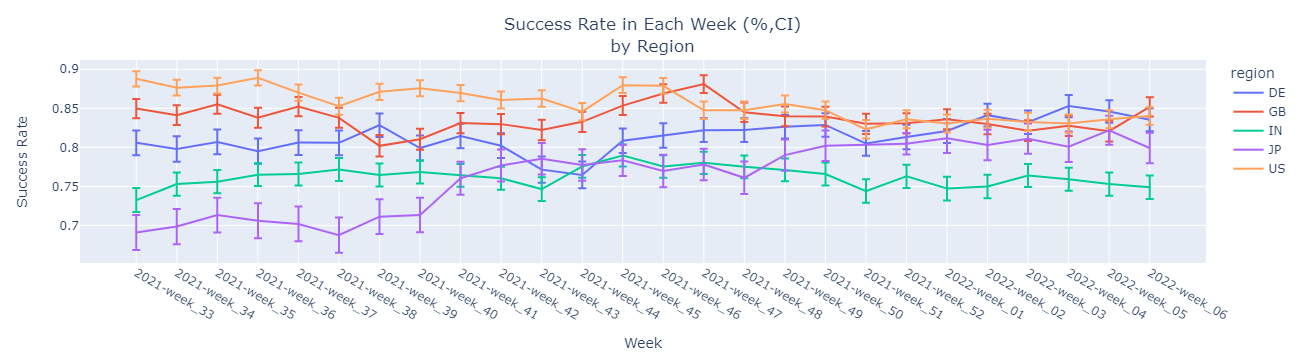

In [520]:
fig = px.line(y=df.success_rate_mean, color=df.region, x=df.index, error_y=df.error, labels={"y":"Success Rate", "x":"Week", "color":"region"})
fig.update_layout(title_text='Success Rate in Each Week (%,CI)<br>by Region', title_x=0.5)

fig.show()

A to Q23:

In [612]:
# 23. Present WoW table/graph with success rate and CI (see image below) per region and rec type
suc_rate = ad_recs_annotated.groupby(["region","recommendation_type","week_id"])["success"].value_counts()

indx = suc_rate.index#.tolist()
indx = indx.droplevel(-1)
indx = indx.unique().tolist()
indx = pd.MultiIndex.from_tuples(indx, names=["region","recommendation_type","week_id"])
# display(indx)
df = pd.DataFrame({col : [np.nan]*len(indx) for col in cols}, columns=cols, index=indx)

rec_types = ad_recs_annotated.recommendation_type.unique().tolist()

for c in countries:
    for typ in rec_types:
        for week in df.loc[(c, typ)].index.tolist():
            mu, CI = mean_CI_calc(rate=suc_rate, idx=(c,typ,week))
            df.loc[(c,typ,week),["success_rate_mean","success_rate_CI"]] = mu, CI

display(df)
# for plotly:
df = df.reset_index(["region","recommendation_type"]) 
df["low_CI"] = df.success_rate_CI.apply(lambda x: float(x.split(" - ")[1]))
df["high_CI"] = df.success_rate_CI.apply(lambda x: float(x.split(" - ")[0]))
df["error"] = df["high_CI"] - df.success_rate_mean 
display(df)

success_rate_mean  success_rate_CI  \
region recommendation_type week_id                                            
DE     Qality              2021-week_33           0.805556  0.8233 - 0.7878   
                           2021-week_34           0.792911   0.8108 - 0.775   
                           2021-week_35           0.804865  0.8229 - 0.7868   
                           2021-week_36           0.799793  0.8177 - 0.7819   
                           2021-week_37           0.802639  0.8206 - 0.7847   
...                                                    ...              ...   
US     Yield               2022-week_02           0.825086  0.8389 - 0.8113   
                           2022-week_03           0.816489  0.8313 - 0.8017   
                           2022-week_04           0.809355  0.8246 - 0.7941   
                           2022-week_05           0.815982  0.8309 - 0.8011   
                           2022-week_06           0.812128  0.8274 - 0.7969   

                                         severe_rate_mean  severe_rate_CI  
region recommendation_type week_id                                         
DE     Qality              2021-week_33               NaN             NaN  
                           2021-week_34               NaN             NaN  
                           2021-week_35               NaN             NaN  
                           2021-week_36               NaN             NaN  
                           2021-week_37               NaN             NaN  
...                                                   ...             ...  
US     Yield               2022-week_02               NaN             NaN  
                           2022-week_03               NaN             NaN  
                           2022-week_04               NaN             NaN  
                           2022-week_05               NaN             NaN  
                           2022-week_06               NaN             NaN  

[258 rows x 4 columns]

,region,recommendation_type,success_rate_mean,success_rate_CI,severe_rate_mean,severe_rate_CI,low_CI,high_CI,error
week_id,,,,,,,,,
2021-week_33,DE,Qality,0.805556,0.8233 - 0.7878,NaN,NaN,0.7878,0.8233,0.017744
2021-week_34,DE,Qality,0.792911,0.8108 - 0.775,NaN,NaN,0.7750,0.8108,0.017889
2021-week_35,DE,Qality,0.804865,0.8229 - 0.7868,NaN,NaN,0.7868,0.8229,0.018035
2021-week_36,DE,Qality,0.799793,0.8177 - 0.7819,NaN,NaN,0.7819,0.8177,0.017907
2021-week_37,DE,Qality,0.802639,0.8206 - 0.7847,NaN,NaN,0.7847,0.8206,0.017961
...,...,...,...,...,...,...,...,...,...
2022-week_02,US,Yield,0.825086,0.8389 - 0.8113,NaN,NaN,0.8113,0.8389,0.013814
2022-week_03,US,Yield,0.816489,0.8313 - 0.8017,NaN,NaN,0.8017,0.8313,0.014811
2022-week_04,US,Yield,0.809355,0.8246 - 0.7941,NaN,NaN,0.7941,0.8246,0.015245


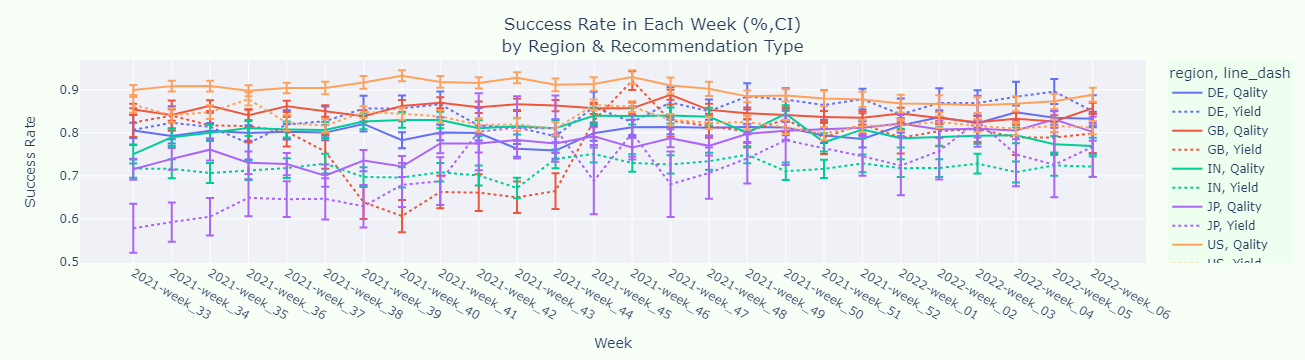

In [623]:
fig = px.line(y=df.success_rate_mean, color=df.region, x=df.index, error_y=df.error, labels={"y":"Success Rate", "x":"Week", "color":"region"}, line_dash=df.recommendation_type)
fig.update_layout(title_text='Success Rate in Each Week (%,CI)<br>by Region & Recommendation Type', title_x=0.5,paper_bgcolor='rgba(0,255,0,0.03)', plot_bgcolor='rgba(100,0,255,0.05)')

fig.show()

A to Q24:

In [525]:
# 24. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
suc_rate = ad_recs_annotated.groupby(["region","rec_provider","week_id"])["success"].value_counts()

indx = suc_rate.index#.tolist()
indx = indx.droplevel(-1)
indx = indx.unique().tolist()
indx = pd.MultiIndex.from_tuples(indx, names=["region","rec_provider","week_id"])
# display(indx)
df = pd.DataFrame({col : [np.nan]*len(indx) for col in cols}, columns=cols, index=indx)

providers = ad_recs_annotated.rec_provider.unique().tolist()

for c in countries:
    for prov in providers:
        try:
            for week in df.loc[(c, prov)].index.tolist():
                mu, CI = mean_CI_calc(rate=suc_rate, idx=(c,prov,week))
                df.loc[(c,prov,week),["success_rate_mean","success_rate_CI"]] = mu, CI
        except KeyError:
            pass

display(df)
# for plotly:
df = df.reset_index(["region","rec_provider"]) 
df["low_CI"] = df.success_rate_CI.apply(lambda x: float(x.split(" - ")[1]))
df["high_CI"] = df.success_rate_CI.apply(lambda x: float(x.split(" - ")[0]))
df["error"] = df["high_CI"] - df.success_rate_mean 
display(df)

K
K
K
KKKKKK


success_rate_mean  success_rate_CI  \
region rec_provider week_id                                            
DE     BooksQ       2021-week_33           0.838235  0.9258 - 0.7507   
                    2021-week_34           0.833333  0.9103 - 0.7563   
                    2021-week_35           0.846154  0.9262 - 0.7661   
                    2021-week_36           0.770833  0.8549 - 0.6868   
                    2021-week_37           0.712329  0.8162 - 0.6085   
...                                             ...              ...   
US     XGBY         2022-week_02           0.880952   0.9299 - 0.832   
                    2022-week_03           0.864286   0.921 - 0.8076   
                    2022-week_04           0.900000  0.9497 - 0.8503   
                    2022-week_05           0.862903  0.9234 - 0.8024   
                    2022-week_06           0.838028  0.8986 - 0.7774   

                                  severe_rate_mean  severe_rate_CI  
region rec_provider week_id                                         
DE     BooksQ       2021-week_33               NaN             NaN  
                    2021-week_34               NaN             NaN  
                    2021-week_35               NaN             NaN  
                    2021-week_36               NaN             NaN  
                    2021-week_37               NaN             NaN  
...                                            ...             ...  
US     XGBY         2022-week_02               NaN             NaN  
                    2022-week_03               NaN             NaN  
                    2022-week_04               NaN             NaN  
                    2022-week_05               NaN             NaN  
                    2022-week_06               NaN             NaN  

[1212 rows x 4 columns]

,region,rec_provider,success_rate_mean,success_rate_CI,severe_rate_mean,severe_rate_CI,low_CI,high_CI,error
week_id,,,,,,,,,
2021-week_33,DE,BooksQ,0.838235,0.9258 - 0.7507,NaN,NaN,0.7507,0.9258,0.087565
2021-week_34,DE,BooksQ,0.833333,0.9103 - 0.7563,NaN,NaN,0.7563,0.9103,0.076967
2021-week_35,DE,BooksQ,0.846154,0.9262 - 0.7661,NaN,NaN,0.7661,0.9262,0.080046
2021-week_36,DE,BooksQ,0.770833,0.8549 - 0.6868,NaN,NaN,0.6868,0.8549,0.084067
2021-week_37,DE,BooksQ,0.712329,0.8162 - 0.6085,NaN,NaN,0.6085,0.8162,0.103871
...,...,...,...,...,...,...,...,...,...
2022-week_02,US,XGBY,0.880952,0.9299 - 0.832,NaN,NaN,0.8320,0.9299,0.048948
2022-week_03,US,XGBY,0.864286,0.921 - 0.8076,NaN,NaN,0.8076,0.9210,0.056714
2022-week_04,US,XGBY,0.900000,0.9497 - 0.8503,NaN,NaN,0.8503,0.9497,0.049700


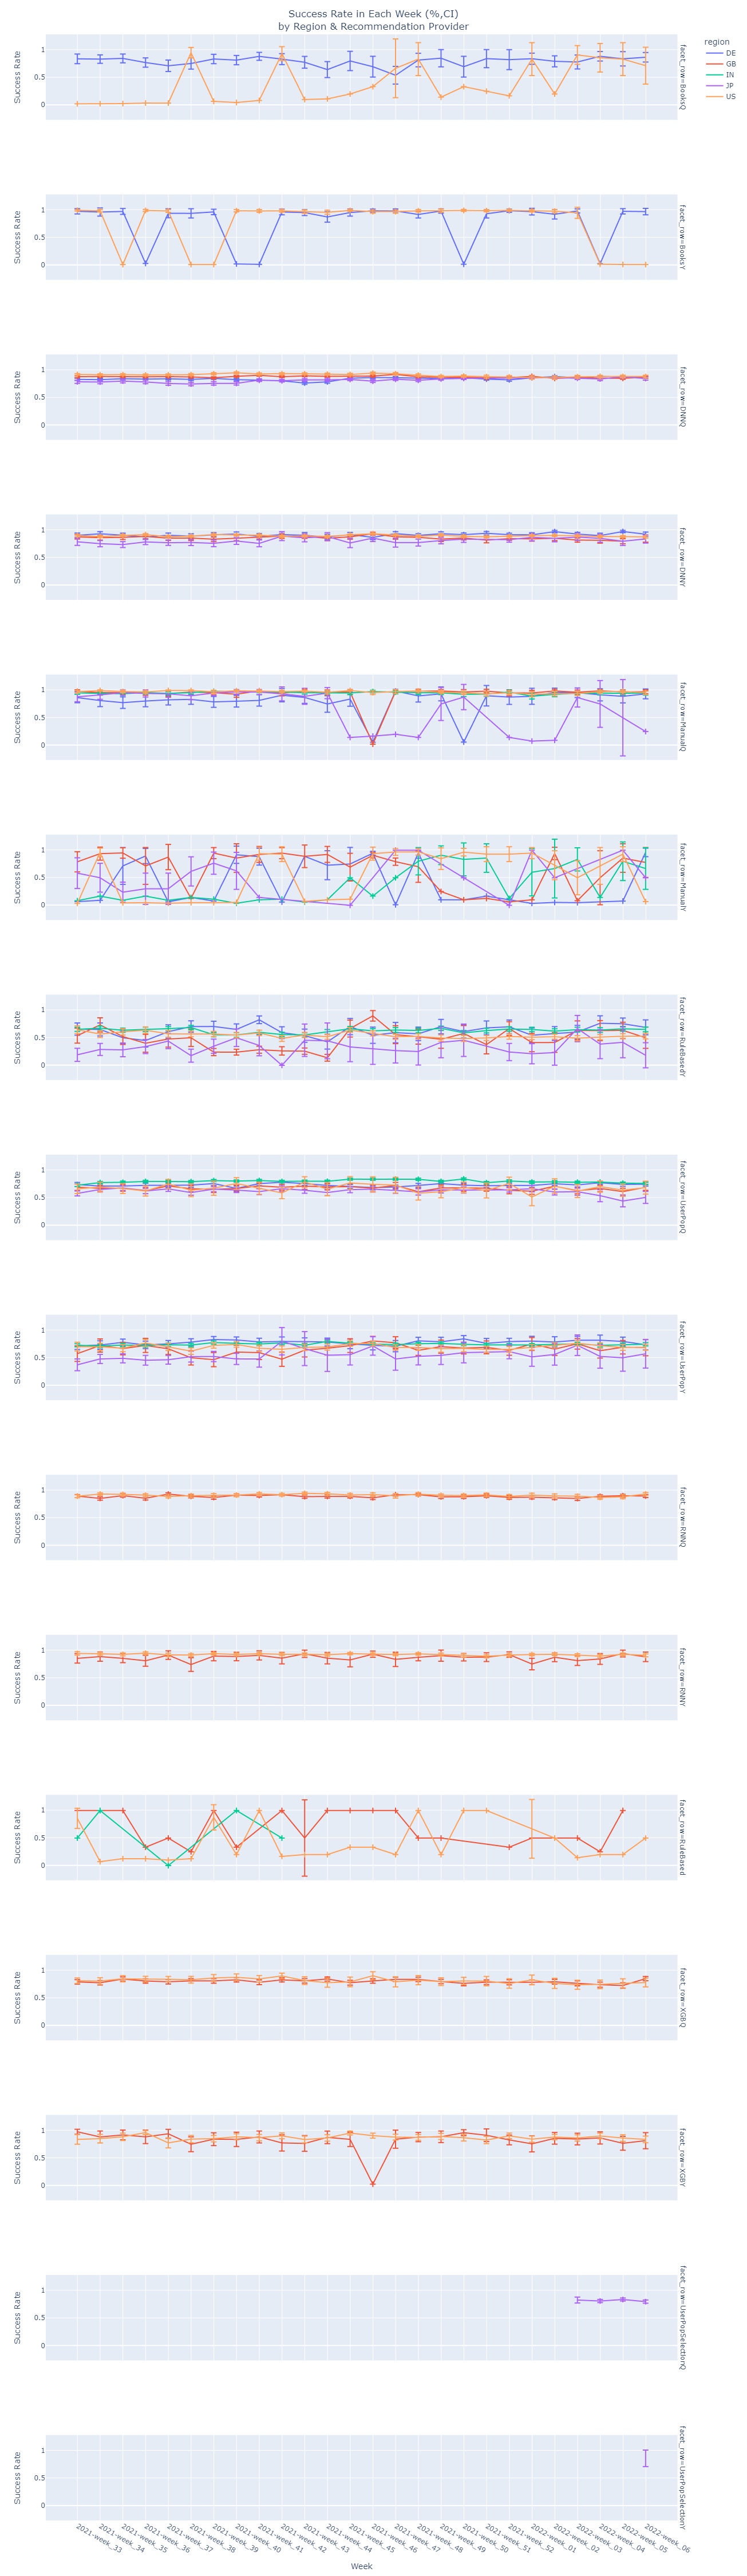

In [543]:
fig = px.line(y=df.success_rate_mean, color=df.region, x=df.index, error_y=df.error, labels={"y":"Success Rate", "x":"Week", "color":"region"}, facet_row=df.rec_provider, facet_col_wrap=4, height=4500)
fig.update_layout(title_text='Success Rate in Each Week (%,CI)<br>by Region & Recommendation Provider', title_x=0.5)

fig.show()

A to Q25:

In [565]:
# 25. Which are the requester to which we succeed the most?
suc_rate = ad_recs_annotated.groupby(["requester"])["success"].value_counts(normalize=True)
suc_rate = suc_rate.drop(0,level=1)
suc_rate.index = suc_rate.index.droplevel(1)
suc_rate = suc_rate.sort_values(ascending=False)
print("In terms of % of Success, there is a tie since we succeed in 100% of the requests from the following requesters:")
print(suc_rate.head().index.tolist())

suc_rate = ad_recs_annotated.groupby(["requester"])["success"].value_counts(normalize=False)
suc_rate = suc_rate.drop(0,level=1)
suc_rate.index = suc_rate.index.droplevel(1)
suc_rate = suc_rate.sort_values(ascending=False)
print("\nIn terms of Absolute number of Successes:")
print(suc_rate.index[0],suc_rate.iloc[0])#.head())#.index.tolist())

In terms of % of Success, there is a tie since we succeed in 100% of the requests from the following requesters:
['Altammune', 'Cue', 'Derceto', 'FlagTap', 'Marketo Japan']

In terms of Absolute number of Successes:
Search Million Culture 70331


A to Q26:

In [576]:
# 26. Which are the requester to which we produce the most critical defects?

sev_rate = ad_recs_annotated.groupby(["requester"])["is_severe_numeric"].value_counts(normalize=True)
sev_rate = sev_rate.drop(0,level=1)
sev_rate.index = sev_rate.index.droplevel(1)
sev_rate = sev_rate.sort_values(ascending=False)
print("In terms of % of Severe defects:")
print(sev_rate.index[0],sev_rate.iloc[0]*100,"%")

sev_rate = ad_recs_annotated.groupby(["requester"])["is_severe_numeric"].value_counts(normalize=False)
sev_rate = sev_rate.drop(0,level=1)
sev_rate.index = sev_rate.index.droplevel(1)
sev_rate = sev_rate.sort_values(ascending=False)
print("\nIn terms of Absolute number of Severe defects:")
print(sev_rate.index[0],sev_rate.iloc[0])#.head())#.index.tolist())

In terms of % of Severe defects:
PureSafe water systems 100.0 %

In terms of Absolute number of Severe defects:
RelayFoods 9961


A to Q27:

It seems as if the overall trend is a mild increase in the success rate, yet there are significant variations along the way.


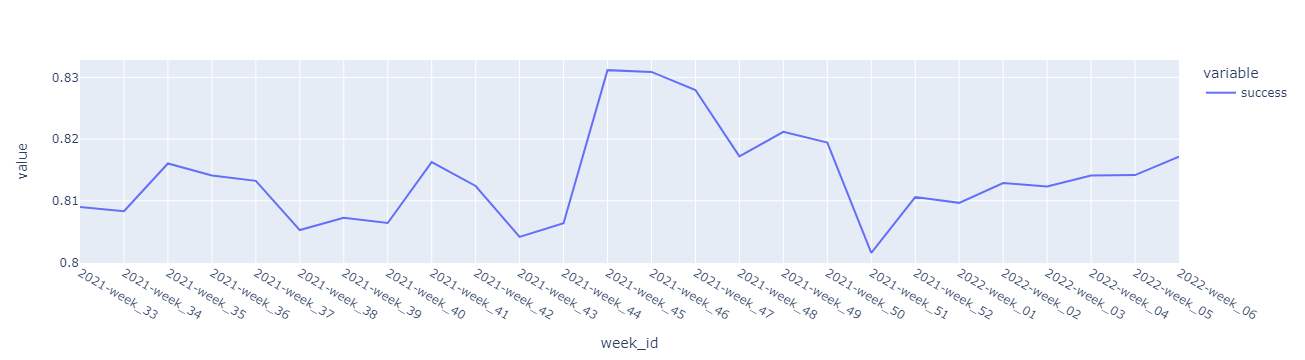

In [577]:
# 27. What is the overall success rate trend over time?
suc_rate = ad_recs_annotated.groupby("week_id")["success"].value_counts(normalize=True)
suc_rate = suc_rate.drop(0,level=1)
suc_rate.index = suc_rate.index.droplevel(1)
print("It seems as if the overall trend is a mild increase in the success rate, yet there are significant variations along the way.")
px.line(suc_rate)

A to Q28:

It seems as if the overall trend is a mild decrease in the rate of severe defects, yet there are significant variations along the way.


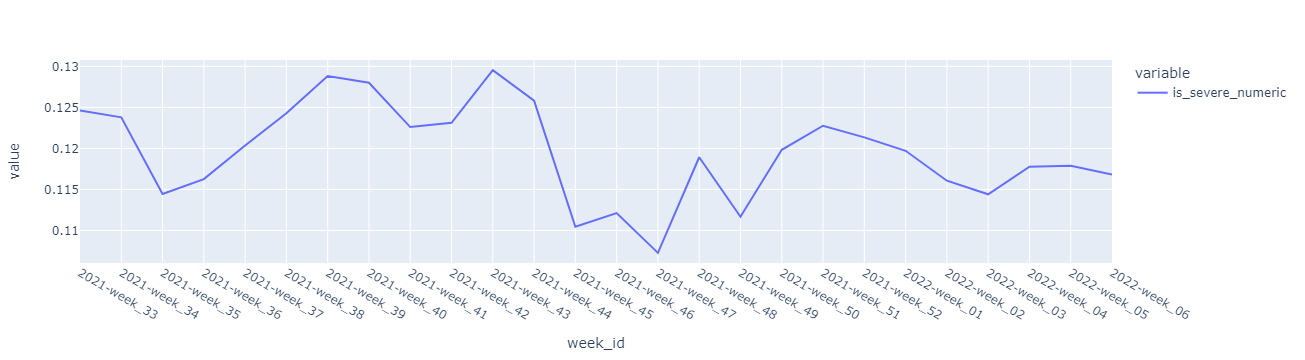

In [581]:
# 28. What is the overall sever defect rate trend over time?
sev_rate = ad_recs_annotated.groupby("week_id")["is_severe_numeric"].value_counts(normalize=True)
sev_rate = sev_rate.drop(0,level=1)
sev_rate.index = sev_rate.index.droplevel(1)
print("It seems as if the overall trend is a mild decrease in the rate of severe defects, yet there are significant variations along the way.")
px.line(sev_rate)

A to Q29:

In [585]:
# 29. Preset a WoW graph showing the number of requests per customer in each region (hint: use stacked bars), from it:
ser = ad_recs_annotated.groupby(["region","requester"])["rec_provider"].count()
df = ser.to_frame().reset_index()
df

,region,requester,rec_provider
0,DE,Allthetopbananas.com,51
1,DE,Bizanga,107
2,DE,Crescendo Networks,573
3,DE,Cuiker,6
4,DE,Extreme DA,115
...,...,...,...
105,US,Sensor Tower,3503
106,US,Tab Solutions,9790
107,US,VarVee,119
108,US,aPriori Technologies,57


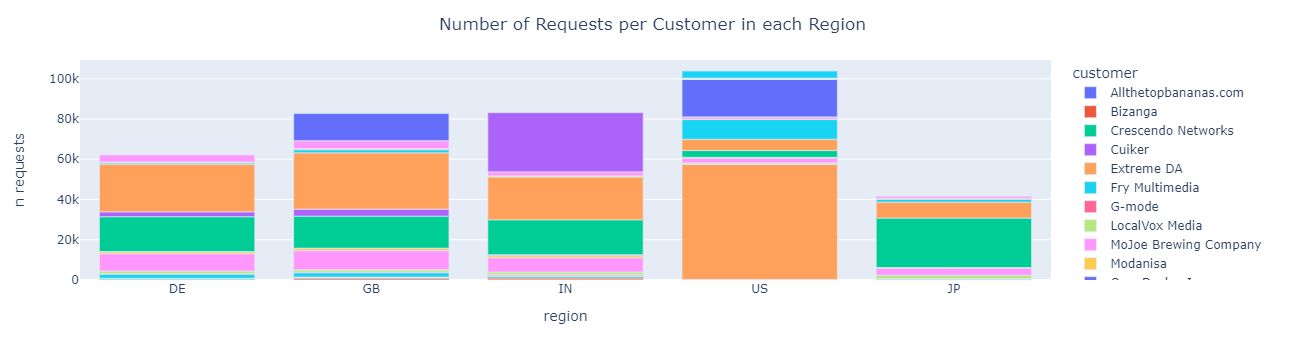

In [593]:
fig = px.bar(x=df.region, y=df.rec_provider, color=df.requester, barmode="relative", labels={"x":"region", "y":"n requests", "color":"customer"})
fig.update_layout(title_text='Number of Requests per Customer in each Region', title_x=0.5)

fig.show()

A to Q30:

In [682]:
# 30. Identify major traffic shape changes (addition/removal) of major clients

ser = ad_recs_annotated.groupby(["week_id","requester"])["rec_provider"].count()
df = ser.to_frame().reset_index()

# To only see major clients, ignore those below the mean:
df = df.drop(df[df.rec_provider < np.mean(ser)].index)

week_sum = ad_recs_annotated.week_id.value_counts()

df["%_rec_provider"] = df.apply(lambda x: 100*x[2]/week_sum[x[0]], axis=1)

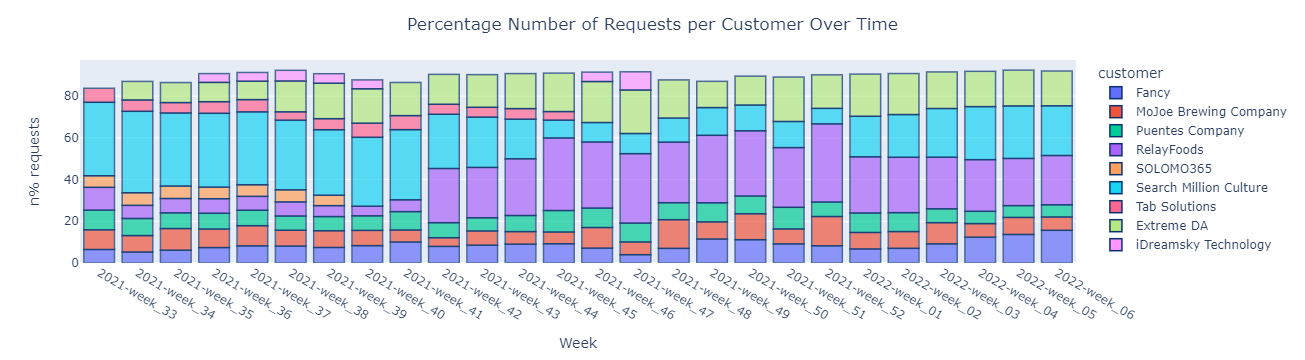

It is easy to see, for example, that 'RelayFood' broke into the market on week 41, and that 'Searh Million Culture' had a tough episode (weeks 44~52), from which it only partly recovered.
Note: the normalized bars don't reach 100% since minor customers are not shown.


In [686]:
fig = px.bar(x=df.week_id, y=df["%_rec_provider"], color=df.requester, barmode="relative", labels={"x":"Week", "y":"n% requests", "color":"customer"}, opacity=0.7)
fig.update_layout(title_text='Percentage Number of Requests per Customer Over Time', title_x=0.5)
fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.show()
print("It is easy to see, for example, that 'RelayFood' broke into the market on week 41, and that 'Searh Million Culture' had a tough episode (weeks 44~52), from which it only partly recovered.")
print("Note: the normalized bars don't reach 100% since minor customers are not shown.")

A to Q31:

In [ ]:
# 31. Preset a WoW graph showing the requests proportion per customer in each region (hint: use stacked bars), from it:

In [702]:
count_per_region_week = ad_recs_annotated.groupby(["region","week_id","requester"])["rec_provider"].count()

sum_per_region_week =  ad_recs_annotated.groupby(["region","week_id","requester"])["rec_provider"].count().groupby(level=[0,1], axis=0).sum()

df = count_per_region_week.to_frame().reset_index()
df["proportion_per_region_week"] = df.apply(lambda x: 100*x[3]/sum_per_region_week[(x[0],x[1])] ,axis=1)
df

,region,week_id,requester,rec_provider,proportion_per_region_week
0,DE,2021-week_33,Bizanga,7,0.292276
1,DE,2021-week_33,Crescendo Networks,9,0.375783
2,DE,2021-week_33,Extreme DA,4,0.167015
3,DE,2021-week_33,Fry Multimedia,82,3.423800
4,DE,2021-week_33,G-mode,11,0.459290
...,...,...,...,...,...
2064,US,2022-week_06,Search Million Culture,163,4.083166
2065,US,2022-week_06,Sensor Tower,60,1.503006
2066,US,2022-week_06,Tab Solutions,246,6.162325
2067,US,2022-week_06,aPriori Technologies,1,0.025050


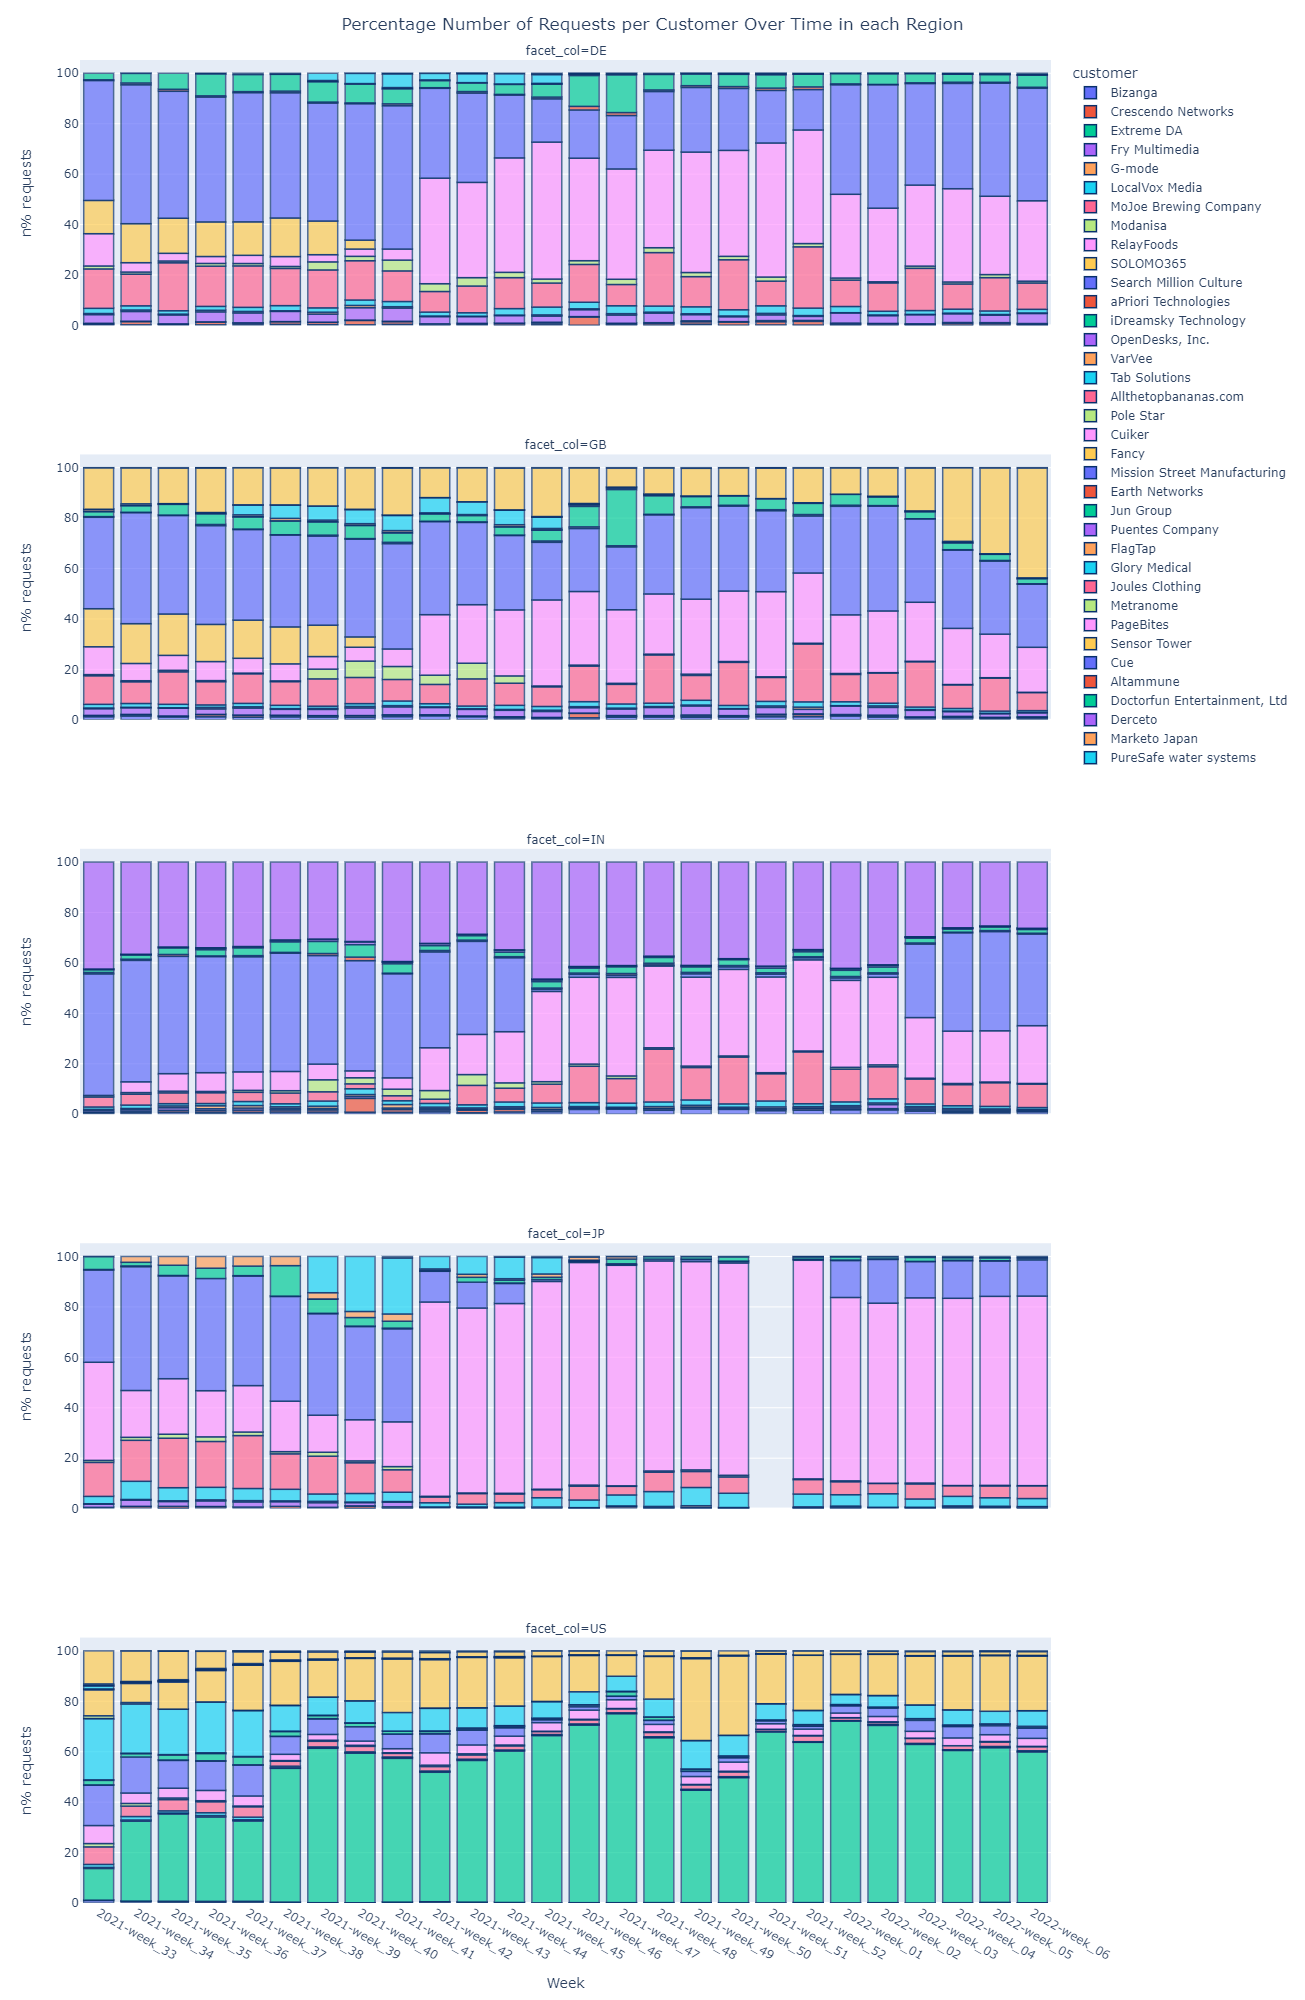

In [703]:
fig = px.bar(x=df.week_id, y=df["proportion_per_region_week"], color=df.requester, barmode="relative", labels={"x":"Week", "y":"n% requests", "color":"customer"}, opacity=0.7, facet_col=df.region, facet_col_wrap=1, height=2000)
fig.update_layout(title_text='Percentage Number of Requests per Customer Over Time in each Region', title_x=0.5)
fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.show()

In [705]:
# 32. Identify major traffic shape changes (addition/removal) of major clients
print("""'SOLOMO365' disappeared from both GB and DE around week 40
In the US, 'Extreme DA' grew from 12% to around 60%
In JP, 'RelayFood' started with 40% and took over 75% of the field (reaching 86% at certain point)""")

'SOLOMO365' disappeared from both GB and DE around week 40
In the US, 'Extreme DA' grew from 12% to around 60%
In JP, 'RelayFood' started with 40% and took over 75% of the field (reaching 86% at certain point)


 
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients

Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

* Add a column with the sample year
* Add a column with the sample quarter (google how to)
* Add a new success column with values 1 and 0 for yes and no 
* Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**
* Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
* Capitlize (first letter only) the is_success column

### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DDNQ, RRNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [29]:
import os
weekly_files = os.listdir('data/weekly/')
sorted(weekly_files)[:10]

['2021_33_DE_Qality_annotation_result.csv',
 '2021_33_DE_Yield_annotation_result.csv',
 '2021_33_DE__Sample.csv',
 '2021_33_GB_Qality_annotation_result.csv',
 '2021_33_GB_Yield_annotation_result.csv',
 '2021_33_GB__Sample.csv',
 '2021_33_IN_Qality_annotation_result.csv',
 '2021_33_IN_Yield_annotation_result.csv',
 '2021_33_IN__Sample.csv',
 '2021_33_JP_Qality_annotation_result.csv']

Your task is to reconstruct the dataset above. 

### Visualizations

Produce the following success rate graph per region:

Produce the following requestser proportion graph:

## Appendix

Code to create weekly files:

In [30]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)